In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# gernerating data

X = np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 + 0.05 * np.random.randn(100)


In [14]:
df = pd.DataFrame()

In [15]:
df['X'] = X.reshape(100)
df['y'] = y

In [16]:
df

,X,y
0,-0.025509,-0.000033
1,-0.327124,0.259145
2,0.156759,0.137350
3,-0.431415,0.530979
4,-0.133403,-0.045539
...,...,...
95,-0.471516,0.761347
96,0.379496,0.443069
97,-0.474141,0.586030
98,0.065984,-0.037102


Text(0.5, 1.0, 'X vs y')

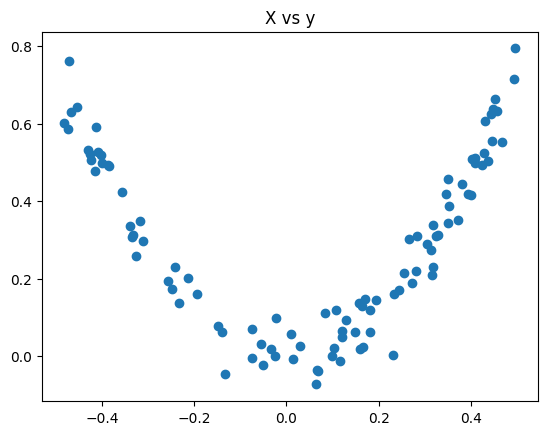

In [19]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [24]:
# Step 1 
# Model 1 ; computing outpu of model 1 
df['pred1'] = df['y'].mean()


In [25]:
df

,X,y,pred1,res1
0,-0.025509,-0.000033,0.293383,-0.293416
1,-0.327124,0.259145,0.293383,-0.034238
2,0.156759,0.137350,0.293383,-0.156033
3,-0.431415,0.530979,0.293383,0.237596
4,-0.133403,-0.045539,0.293383,-0.338922
...,...,...,...,...
95,-0.471516,0.761347,0.293383,0.467964
96,0.379496,0.443069,0.293383,0.149686
97,-0.474141,0.586030,0.293383,0.292647
98,0.065984,-0.037102,0.293383,-0.330485


In [26]:
# need to calculate residual for model 1
df['res1'] = df['y'] - df['pred1']

In [27]:
df

,X,y,pred1,res1
0,-0.025509,-0.000033,0.293383,-0.293416
1,-0.327124,0.259145,0.293383,-0.034238
2,0.156759,0.137350,0.293383,-0.156033
3,-0.431415,0.530979,0.293383,0.237596
4,-0.133403,-0.045539,0.293383,-0.338922
...,...,...,...,...
95,-0.471516,0.761347,0.293383,0.467964
96,0.379496,0.443069,0.293383,0.149686
97,-0.474141,0.586030,0.293383,0.292647
98,0.065984,-0.037102,0.293383,-0.330485


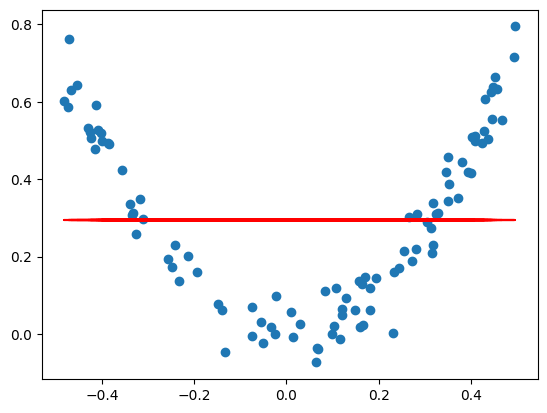

In [28]:
# let's visualize it
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red') # creating the line wrt to prediction

In [ ]:
# Step 2 
# need to create a decision tree as model 2 
# for model 2 input would be same as initail but target would be res1 now

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8) # max_leaf_node lies b/w 8 and 32

In [31]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values) # target is res1

DecisionTreeRegressor(max_leaf_nodes=8)

In [32]:
from sklearn.tree import plot_tree


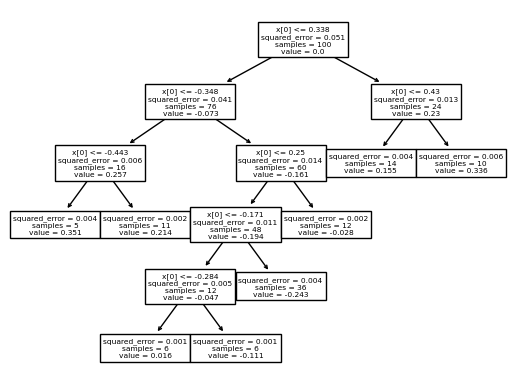

In [33]:
plot_tree(tree1)
plt.show()

In [34]:
# generating X_test
X_test = np.linspace(-0.5,0.5,500)

In [36]:
len(X_test)

500

In [39]:
y_pred = df['pred1'][0] + tree1.predict(X_test.reshape(500,1))

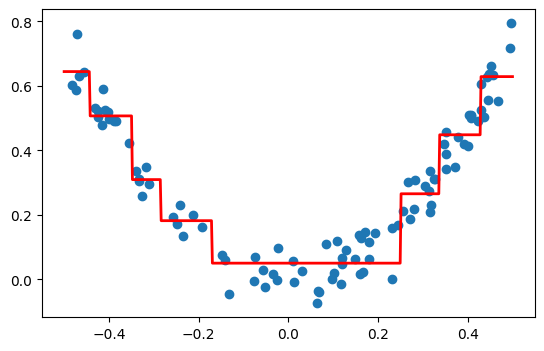

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2, color='red')
plt.scatter(df['X'],df['y'])
plt.show()

In [43]:
df['pred2'] = df['pred1'][0] + tree1.predict(df['X'].values.reshape(100,1))

In [45]:
df

,X,y,pred1,res1,pred2
0,-0.025509,-0.000033,0.293383,-0.293416,0.050676
1,-0.327124,0.259145,0.293383,-0.034238,0.309733
2,0.156759,0.137350,0.293383,-0.156033,0.050676
3,-0.431415,0.530979,0.293383,0.237596,0.507167
4,-0.133403,-0.045539,0.293383,-0.338922,0.050676
...,...,...,...,...,...
95,-0.471516,0.761347,0.293383,0.467964,0.644586
96,0.379496,0.443069,0.293383,0.149686,0.448635
97,-0.474141,0.586030,0.293383,0.292647,0.644586
98,0.065984,-0.037102,0.293383,-0.330485,0.050676


In [46]:
# now calculating residual 2
# actual - (model1 +model2)
# def['pred2'] is model1 +model2
df['res2'] = df['y'] - df['pred2']

In [47]:
df

,X,y,pred1,res1,pred2,res2
0,-0.025509,-0.000033,0.293383,-0.293416,0.050676,-0.050709
1,-0.327124,0.259145,0.293383,-0.034238,0.309733,-0.050587
2,0.156759,0.137350,0.293383,-0.156033,0.050676,0.086674
3,-0.431415,0.530979,0.293383,0.237596,0.507167,0.023812
4,-0.133403,-0.045539,0.293383,-0.338922,0.050676,-0.096215
...,...,...,...,...,...,...
95,-0.471516,0.761347,0.293383,0.467964,0.644586,0.116761
96,0.379496,0.443069,0.293383,0.149686,0.448635,-0.005566
97,-0.474141,0.586030,0.293383,0.292647,0.644586,-0.058556
98,0.065984,-0.037102,0.293383,-0.330485,0.050676,-0.087778


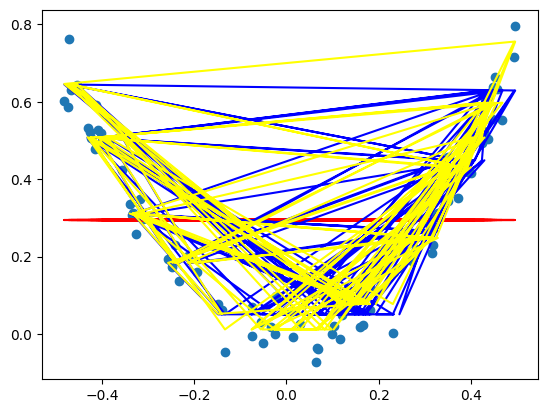

In [60]:
plt.scatter(df['X'],df['y'])

plt.plot(df['X'],df['pred1'],color='red')
plt.plot(df['X'],df['pred2'],color='blue')
plt.plot(df['X'],df['pred3'],color='yellow')
plt.show()



In [49]:
# now we will create another tree
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [50]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values) # target is res1

DecisionTreeRegressor(max_leaf_nodes=8)

In [51]:
y_pred = df['pred1'][0] + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])


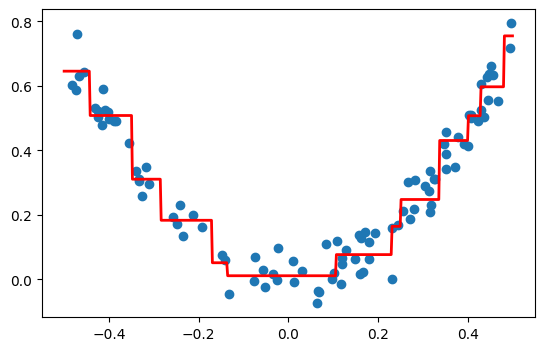

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2, color='red')
plt.scatter(df['X'],df['y'])
plt.show()

In [53]:
df['pred3'] = df['pred2'] + tree2.predict(df['X'].values.reshape(100,1))

In [54]:
df

,X,y,pred1,res1,pred2,res2,pred3
0,-0.025509,-0.000033,0.293383,-0.293416,0.050676,-0.050709,0.011656
1,-0.327124,0.259145,0.293383,-0.034238,0.309733,-0.050587,0.310975
2,0.156759,0.137350,0.293383,-0.156033,0.050676,0.086674,0.077190
3,-0.431415,0.530979,0.293383,0.237596,0.507167,0.023812,0.508409
4,-0.133403,-0.045539,0.293383,-0.338922,0.050676,-0.096215,0.011656
...,...,...,...,...,...,...,...
95,-0.471516,0.761347,0.293383,0.467964,0.644586,0.116761,0.645828
96,0.379496,0.443069,0.293383,0.149686,0.448635,-0.005566,0.430927
97,-0.474141,0.586030,0.293383,0.292647,0.644586,-0.058556,0.645828
98,0.065984,-0.037102,0.293383,-0.330485,0.050676,-0.087778,0.011656


In [ ]:
# continue creating decision tree and compute the pred2